In [37]:
%matplotlib inline
import pandas as pd
import data_preparation as data_prep
from AirNormalizer import AirNormalizer
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 7]

## Confronto Ecopass/Area C/Area B ##
Stazioni scelte:
- Milano via Senato
- Limito di Pioltello
- Bormio

Inquinanti considerati (i più rilevanti per quanto riguarda il traffico come riportato da inventario ISPRA 2020):
- NOX 
- CO
- PM10

In [2]:
milano_nox_data = data_prep.prepare_data(6354,2001,2006,14390,14391,2002,2008)
milano_co_data = data_prep.prepare_data(5834,2001,2006,14390,14391,2002,2008)
milano_pm10_data = data_prep.prepare_data(10320,2001,2006,14390,14391,2002,2008)

In [3]:
limito_nox_data = data_prep.prepare_data(6324,2001,2006,14390,14391,2002,2008)
limito_co_data = data_prep.prepare_data(5825,2001,2006,14390,14391,2002,2008)
limito_pm10_data = data_prep.prepare_data(6908,2001,2006,14390,14391,2002,2008)

In [4]:
bormio_nox_data = data_prep.prepare_data(6374,13,11,19394,19393,19389,19397)
bormio_co_data = data_prep.prepare_data(5842,13,11,19394,19393,19389,19397)
bormio_pm10_data = data_prep.prepare_data(6925,13,11,19394,19393,19389,19397)

In [5]:
path = "../data/tmp/prepared_data/"
milano_nox_data.to_csv(path + "milano_nox.csv")
milano_co_data.to_csv(path + "milano_co.csv")
milano_pm10_data.to_csv(path + "milano_pm10.csv")
limito_nox_data.to_csv(path + "limito_nox.csv")
limito_co_data.to_csv(path + "limito_co.csv")
limito_pm10_data.to_csv(path + "limito_pm10.csv")
bormio_nox_data.to_csv(path + "bormio_nox.csv")
bormio_co_data.to_csv(path + "bormio_co.csv")
bormio_pm10_data.to_csv(path + "bormio_pm10.csv")

In [6]:
milano_nox_normalizer = AirNormalizer(milano_nox_data)
milano_co_normalizer = AirNormalizer(milano_co_data)
milano_pm10_normalizer = AirNormalizer(milano_pm10_data)

milano_nox_norm = milano_nox_normalizer.normalize_timeseries(n_preds=300)
milano_co_norm = milano_co_normalizer.normalize_timeseries(n_preds=300)
milano_pm10_norm = milano_pm10_normalizer.normalize_timeseries(n_preds=300)
milano_nox_norm.to_csv(path + "milano_nox_normalizzato.csv")
milano_co_norm.to_csv(path + "milano_co_normalizzato.csv")
milano_pm10_norm.to_csv(path + "milano_pm10_normalizzato.csv")

In [7]:
limito_nox_normalizer = AirNormalizer(limito_nox_data)
limito_co_normalizer = AirNormalizer(limito_co_data)
limito_pm10_normalizer = AirNormalizer(limito_pm10_data)

limito_nox_norm = limito_nox_normalizer.normalize_timeseries(n_preds=300)
limito_co_norm = limito_co_normalizer.normalize_timeseries(n_preds=300)
limito_pm10_norm = limito_pm10_normalizer.normalize_timeseries(n_preds=300)
limito_nox_norm.to_csv(path + "limito_nox_normalizzato.csv")
limito_co_norm.to_csv(path + "limito_co_normalizzato.csv")
limito_pm10_norm.to_csv(path + "limito_pm10_normalizzato.csv")

In [8]:
bormio_nox_normalizer = AirNormalizer(bormio_nox_data)
bormio_co_normalizer = AirNormalizer(bormio_co_data)
bormio_pm10_normalizer = AirNormalizer(bormio_pm10_data)

bormio_nox_norm = bormio_nox_normalizer.normalize_timeseries(n_preds=300)
bormio_co_norm = bormio_co_normalizer.normalize_timeseries(n_preds=300)
bormio_pm10_norm = bormio_pm10_normalizer.normalize_timeseries(n_preds=300)
bormio_nox_norm.to_csv(path + "bormio_nox_normalizzato.csv")
bormio_co_norm.to_csv(path + "bormio_co_normalizzato.csv")
bormio_pm10_norm.to_csv(path + "bormio_pm10_normalizzato.csv")

### NOX ###

In [9]:
print("MILANO:")
print(milano_nox_normalizer.evaluate_testing())
print("=======================================")
print("LIMITO")
print(limito_nox_normalizer.evaluate_testing())
print("=======================================")
print("BORMIO")
print(bormio_nox_normalizer.evaluate_testing())

MILANO:
MSE     3271.407930
RMSE      57.196223
R2         0.740603
dtype: float64
LIMITO
MSE     6343.950526
RMSE      79.648920
R2         0.732141
dtype: float64
BORMIO
MSE     196.366207
RMSE     14.013073
R2        0.665207
dtype: float64


Le performance dei modelli ottenuti sono abbastanza buone per tutte e 3 le stazioni scelte. Per quanto riguarda quello di Bormio, in particolare, anche se il suo coefficiente $R^2$ è minore degli altri due, l'errore medio è decisamente più basso e questo ci indica che le previsioni fatte dal nostro modello siano comunque attendibili.

In [10]:
print("MILANO:")
print(milano_nox_normalizer.feature_importance())
print("=======================================")
print("LIMITO")
print(limito_nox_normalizer.feature_importance())
print("=======================================")
print("BORMIO")
print(bormio_nox_normalizer.feature_importance())

MILANO:
                    cols       imp
6            day_of_year  0.370431
8                  epoch  0.204086
0            temperatura  0.176329
5             radiazione  0.092017
4                umidita  0.053311
7            day_of_week  0.047235
3         velocita_vento  0.019856
1         precipitazioni  0.014674
10  giorni_senza_pioggia  0.011263
2        direzione_vento  0.008727
9                pioggia  0.002069
LIMITO
                    cols       imp
6            day_of_year  0.419429
8                  epoch  0.288305
0            temperatura  0.094464
5             radiazione  0.066563
7            day_of_week  0.050169
4                umidita  0.034975
3         velocita_vento  0.016055
1         precipitazioni  0.012905
10  giorni_senza_pioggia  0.008610
2        direzione_vento  0.006779
9                pioggia  0.001745
BORMIO
                    cols       imp
6            day_of_year  0.423134
8                  epoch  0.372852
7            day_of_week  0.06502

Anche l'importanza delle variabili rimane abbastanza simile in tutti e tre i modelli, con il giorno dell'anno e la data che risultano di gran lunga le più importanti. 

Andiamo ora a mostrare i grafici delle timeseries di ciascuna stazione.

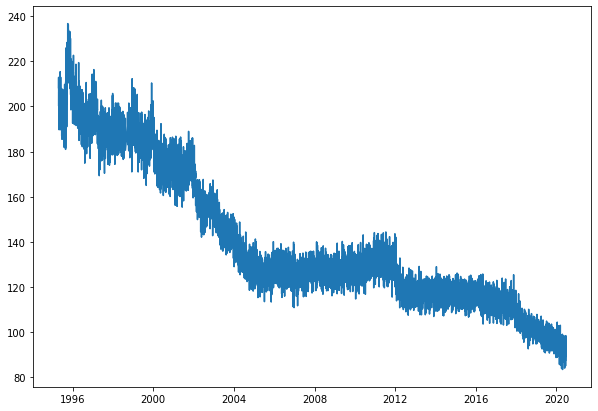

In [38]:
plt.plot(milano_nox_norm.index, milano_nox_norm.inquinante)
plt.show()

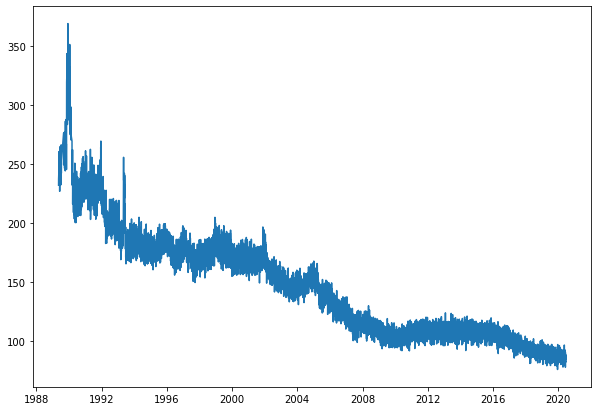

In [39]:
plt.plot(limito_nox_norm.index, limito_nox_norm.inquinante)
plt.show()

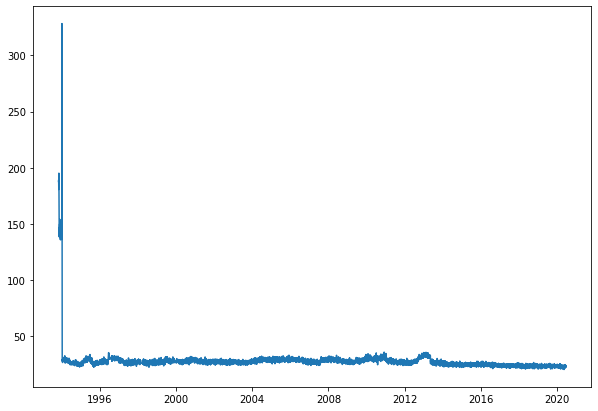

In [40]:
plt.plot(bormio_nox_norm.index, bormio_nox_norm.inquinante)
plt.show()

La serie ottenuta dal modello di Bormio risulta particolare, in quanto rimane costante ad un valore molto basso. Proviamo a controllare i dati grezzi per verificare come mai si possa aver ottenuto un risultato di questo tipo.

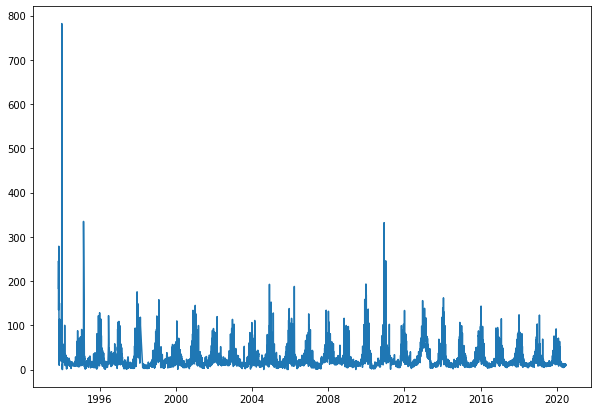

In [41]:
plt.plot(bormio_nox_data.index, bormio_nox_data.inquinante)
plt.show()

Anche dall'analisi dei dati grezzi si vede come, tolti i classici picchi delle stagioni invernali, i valori siano sempre rimasti molto bassi.  
Dai risultati ottenuti mi viene quindi il sospetto che la timeseries normalizzata di questa stazione possa fondamentalmente rappresentare il famoso **fondo naturale**, che infatti rimane invariato nel corso degli ultimi 25 anni.

Calcoliamo le medie mensili di tutte e 3 le timeseries e proviamo a plottarle insieme, per verificare se si notano delle differenze negli andamenti.  
Sul grafico saranno inoltre riportate, tramite le 3 linee verticali, le date dell'entrata in vigore dei 3 provvedimenti di limitazione della circolazione di Milano: Ecopass, Area C e Area B.

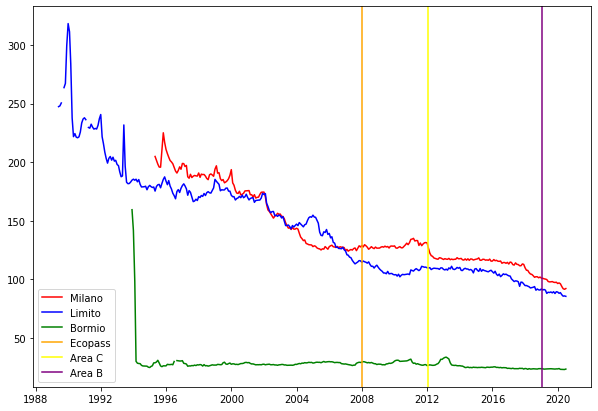

In [59]:
import datetime as dt

milano_nox_mesenorm = milano_nox_norm.groupby(pd.Grouper(freq="M")).mean()
limito_nox_mesenorm = limito_nox_norm.groupby(pd.Grouper(freq="M")).mean()
bormio_nox_mesenorm = bormio_nox_norm.groupby(pd.Grouper(freq="M")).mean()

plt.plot(milano_nox_mesenorm.index, milano_nox_mesenorm.inquinante, "-r", label="Milano")
plt.plot(limito_nox_mesenorm.index, limito_nox_mesenorm.inquinante, "-b", label="Limito")
plt.plot(bormio_nox_mesenorm.index, bormio_nox_mesenorm.inquinante, "-g", label="Bormio")
plt.axvline(dt.datetime(2008,1,1), color="orange", label="Ecopass")
plt.axvline(dt.datetime(2012,1,16), color="yellow", label="Area C")
plt.axvline(dt.datetime(2019,1,21), color="purple", label="Area B")
plt.legend()
plt.show()

Ad esclusione di quella di Bormio, di cui abbiamo già parlato prima, gli andamenti delle altre due serie, relative a Milano e Limito, risultano simili.  
L'introduzione di Ecopass ed Area B non sembra aver portato nessun miglioramento per quanto riguarda le concentrazioni di Ossidi di azoto registrate. Per quanto riguarda Area C sembra che in corrispondenza della sua introduzione il nostro modello abbia rilevato una diminuzione dei livelli di NOx registrati. Sicuramente questo ribassamento (che è comunque molto RIDOTTO) potrebbe essere legato ad un calo dei veicoli circolanti a seguito dell'introduzione del provvedimento. Nonostante ciò, comunque, non si sono registrati sicuramente i ribassi dichiarati dal comune di Milano  e guardando il quadro generale sembra comunque che le concentrazioni abbiano mantenuto un andamento compatibile sia col trend negativo che si registrava per la stazione stessa che con l'andamento avuto per quella di Limito. 

### CO ###

In [18]:
print("MILANO:")
print(milano_co_normalizer.evaluate_testing())
print("=======================================")
print("LIMITO")
print(limito_co_normalizer.evaluate_testing())
print("=======================================")
print("BORMIO")
print(bormio_co_normalizer.evaluate_testing())

MILANO:
MSE     0.175268
RMSE    0.418651
R2      0.788953
dtype: float64
LIMITO
MSE     0.118229
RMSE    0.343845
R2      0.821753
dtype: float64
BORMIO
MSE     0.034657
RMSE    0.186163
R2      0.709228
dtype: float64


Le prestazioni dei modelli ottenuti risultano anche migliori di quanto ottenuto in precedenza per gli NOx, con il modello di Bormio che ancora una volta fa registrare un coefficiente $R^2$ peggiore ma un $RMSE$ migliore.

In [20]:
print("MILANO:")
print(milano_co_normalizer.feature_importance())
print("=======================================")
print("LIMITO")
print(limito_co_normalizer.feature_importance())
print("=======================================")
print("BORMIO")
print(bormio_co_normalizer.feature_importance())

MILANO:
                    cols       imp
8                  epoch  0.432212
6            day_of_year  0.303934
0            temperatura  0.107647
5             radiazione  0.049508
4                umidita  0.037864
7            day_of_week  0.032215
1         precipitazioni  0.016052
3         velocita_vento  0.008115
10  giorni_senza_pioggia  0.006827
2        direzione_vento  0.004545
9                pioggia  0.001081
LIMITO
                    cols       imp
8                  epoch  0.387215
6            day_of_year  0.343151
0            temperatura  0.104295
5             radiazione  0.055190
4                umidita  0.032891
7            day_of_week  0.032650
3         velocita_vento  0.016829
2        direzione_vento  0.011337
1         precipitazioni  0.008379
10  giorni_senza_pioggia  0.006863
9                pioggia  0.001199
BORMIO
                    cols       imp
6            day_of_year  0.478409
8                  epoch  0.333445
0            temperatura  0.07319

Anche in questo caso l'importanza delle variabili è abbastanza simile per tutti e 3 i modelli generati, con giorno dell'anno e data che risultano nuovamente le più influenti come è normale aspettarsi vista la stagionalità dell'inquinante ed il trend negativo che si registra ormai da anni.

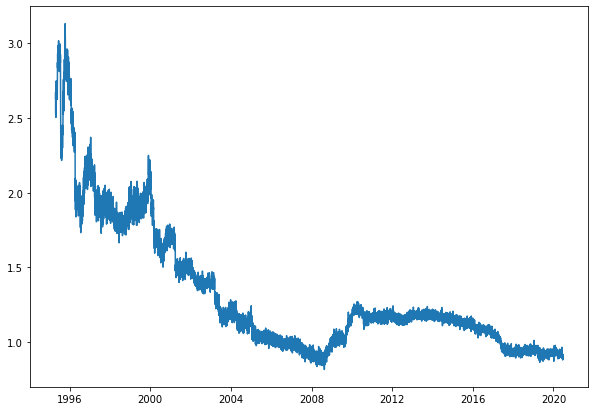

In [44]:
plt.plot(milano_co_norm.index, milano_co_norm.inquinante)
plt.show()

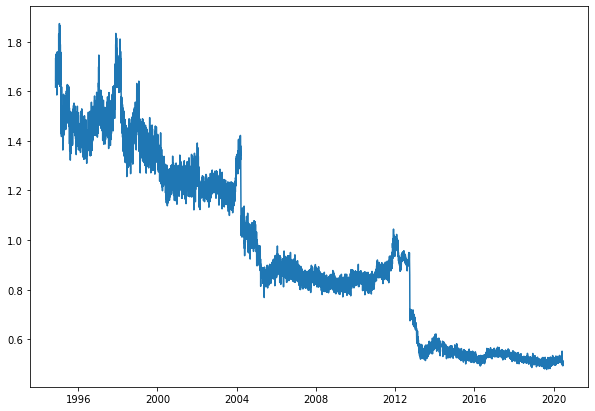

In [45]:
plt.plot(limito_co_norm.index, limito_co_norm.inquinante)
plt.show()

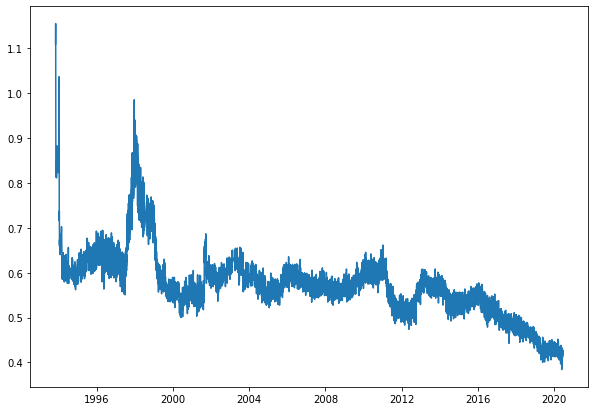

In [46]:
plt.plot(bormio_co_norm.index, bormio_co_norm.inquinante)
plt.show()

Anche in questo caso viene confermata l'esistenza di un trend negativo, anche se per quanto riguarda la stazione di Bormio risulta decisamente meno marcato che per le altre due, forse anche a causa del fatto che in quella zona l'uso di legname come fonte di riscaldamento sia molto frequente? Sicuramente l'aspetto merita di essere approfondito in analisi successive.  

Ripetiamo quanto fatto in precedenza per mostrare le date di introduzione dei provvedimenti di limitazione del traffico.

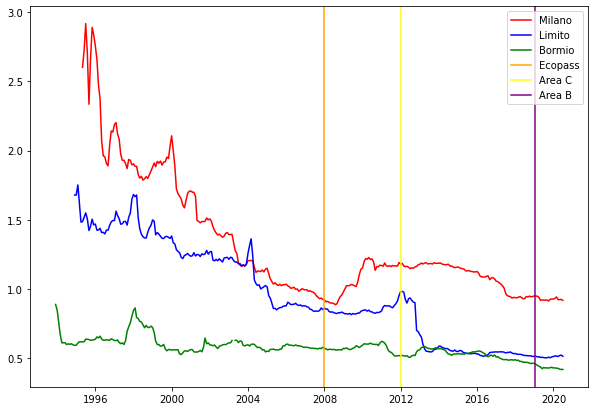

In [60]:
milano_co_mesenorm = milano_co_norm.groupby(pd.Grouper(freq="M")).mean()
limito_co_mesenorm = limito_co_norm.groupby(pd.Grouper(freq="M")).mean()
bormio_co_mesenorm = bormio_co_norm.groupby(pd.Grouper(freq="M")).mean()

plt.plot(milano_co_mesenorm.index, milano_co_mesenorm.inquinante, "-r", label="Milano")
plt.plot(limito_co_mesenorm.index, limito_co_mesenorm.inquinante, "-b", label="Limito")
plt.plot(bormio_co_mesenorm.index, bormio_co_mesenorm.inquinante, "-g", label="Bormio")
plt.axvline(dt.datetime(2008,1,1), color="orange", label="Ecopass")
plt.axvline(dt.datetime(2012,1,16), color="yellow", label="Area C")
plt.axvline(dt.datetime(2019,1,21), color="purple", label="Area B")
plt.legend()
plt.show()

Per quanto riguarda il monossido di carbonio non sembra che l'introduzione dei provvedimenti abbia avuto alcun effetto sulle concentrazioni registrate (anzi, sembra quasi che dopo l'introduzione dell'Ecopass a Milano i livelli di CO siano aumentati).

### PM10 ###

In [24]:
print("MILANO:")
print(milano_pm10_normalizer.evaluate_testing())
print("=======================================")
print("LIMITO")
print(limito_pm10_normalizer.evaluate_testing())
print("=======================================")
print("BORMIO")
print(bormio_pm10_normalizer.evaluate_testing())

MILANO:
MSE     230.243817
RMSE     15.173787
R2        0.659561
dtype: float64
LIMITO
MSE     308.822777
RMSE     17.573354
R2        0.674645
dtype: float64
BORMIO
MSE     74.086912
RMSE     8.607375
R2       0.507435
dtype: float64


Notiamo subito che viene confermato un aspetto che già era stato evidenziato nelle nostre analisi di prova svolte per mettere a punto la tecnica con cui eseguire la normalizzazione: quando si tratta il PM10 i modelli ottenuti hanno prestazioni peggiori rispetto a quelli di altri inquinanti. Questo ancora una volta ci conferma come le polveri sottili siano quindi regolate anche da processi meteorologici su più larga scala che non possono quindi essere individuati (o comunque non si riesce a farlo con precisione) con le nostre variabili.

In [25]:
print("MILANO:")
print(milano_pm10_normalizer.feature_importance())
print("=======================================")
print("LIMITO")
print(limito_pm10_normalizer.feature_importance())
print("=======================================")
print("BORMIO")
print(bormio_pm10_normalizer.feature_importance())

MILANO:
                    cols       imp
0            temperatura  0.207725
6            day_of_year  0.189385
4                umidita  0.115805
5             radiazione  0.114782
8                  epoch  0.099859
1         precipitazioni  0.076461
10  giorni_senza_pioggia  0.068333
3         velocita_vento  0.067540
7            day_of_week  0.026952
2        direzione_vento  0.025959
9                pioggia  0.007200
LIMITO
                    cols       imp
6            day_of_year  0.288238
0            temperatura  0.177393
8                  epoch  0.156061
4                umidita  0.093841
5             radiazione  0.082930
1         precipitazioni  0.050333
10  giorni_senza_pioggia  0.047993
3         velocita_vento  0.043389
7            day_of_week  0.039229
2        direzione_vento  0.012912
9                pioggia  0.007682
BORMIO
                    cols       imp
6            day_of_year  0.337172
8                  epoch  0.328339
0            temperatura  0.13177

Ad esclusione del modello di Bormio, per cui giorno dell'anno e data risultano ancora le variabili di gran lunga più importanti, negli altri due modelli viene data molta importanza anche alla temperatura.

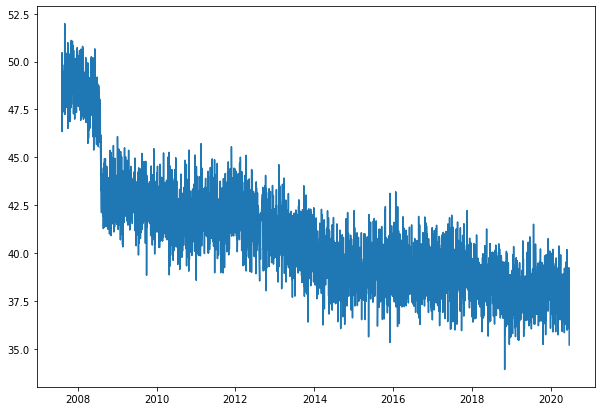

In [48]:
plt.plot(milano_pm10_norm.index, milano_pm10_norm.inquinante)
plt.show()

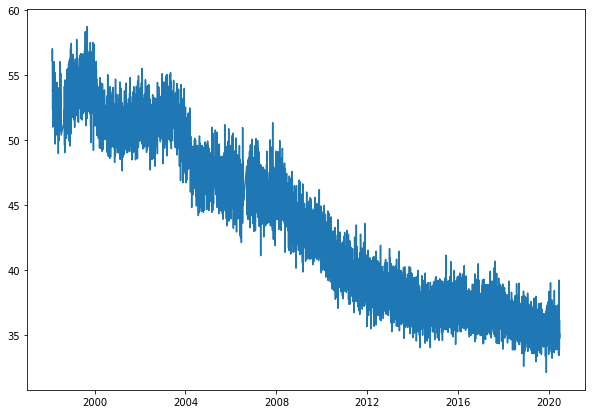

In [49]:
plt.plot(limito_pm10_norm.index, limito_pm10_norm.inquinante)
plt.show()

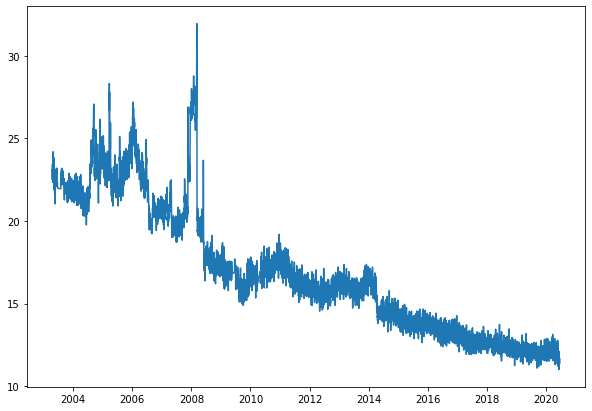

In [50]:
plt.plot(bormio_pm10_norm.index, bormio_pm10_norm.inquinante)
plt.show()

Anche in questo caso viene quindi confermato il trend negativo per tutte e tre le stazioni.

Ripetiamo quanto fatto in precedenza per valutare i provvedimenti di limitazione del traffico imposti a Milano.

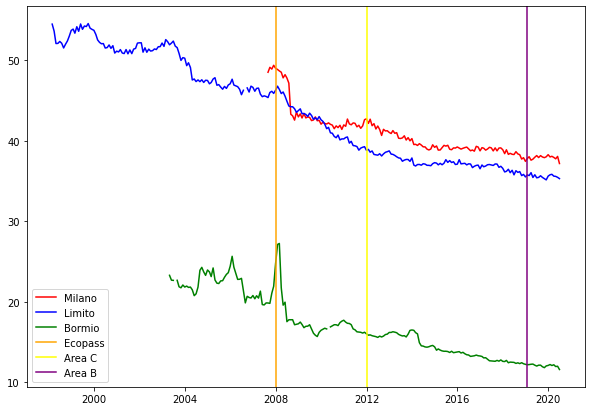

In [61]:
milano_pm10_mesenorm = milano_pm10_norm.groupby(pd.Grouper(freq="M")).mean()
limito_pm10_mesenorm = limito_pm10_norm.groupby(pd.Grouper(freq="M")).mean()
bormio_pm10_mesenorm = bormio_pm10_norm.groupby(pd.Grouper(freq="M")).mean()

plt.plot(milano_pm10_mesenorm.index, milano_pm10_mesenorm.inquinante, "-r", label="Milano")
plt.plot(limito_pm10_mesenorm.index, limito_pm10_mesenorm.inquinante, "-b", label="Limito")
plt.plot(bormio_pm10_mesenorm.index, bormio_pm10_mesenorm.inquinante, "-g", label="Bormio")
plt.axvline(dt.datetime(2008,1,1), color="orange", label="Ecopass")
plt.axvline(dt.datetime(2012,1,16), color="yellow", label="Area C")
plt.axvline(dt.datetime(2019,1,21), color="purple", label="Area B")
plt.legend()
plt.show()

Anche in questo caso sembra che l'introduzione dei provvedimenti abbia avuto degli effetti quasi nulli sulle concentrazioni registrate. Si nota infatti chiaramente come l'andamento della serie di Milano sia praticamente uguale a quello calcolato per Limito e, seppur con valori decisamente più bassi, anche con quello di Bormio.

Già da queste prime analisi, quindi, si capisce bene come i provvedimenti introdotti non abbiano portato quasi mai a dei miglioramenti se non di grandezza minima. Il trend negativo nel corso degli anni rimane sempre praticamente invariato, suggerendoci quindi che l'innovazione tecnologica e le nuove normative introdotte (ma NON quelle di questo tipo) abbiano avuto sicuramente una maggior importanza ed efficacia nell'abbattimento delle concentrazioni.